In [4]:
def experiment(X, y):
    # 1. Получение важности из Sklearn, rfpimp, treeinterpreter (Возвращает (Series, Series, Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, imp_tree, rf, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    print(f'the importance of treeinterpreter: {imp_tree}')
    
    # 2. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    
    # 3. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    
    # 4. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 5. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    # 6. Получение важности из r_partykit_cforest (Возвращает Series)
    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')

    # 7. Получение важности из ufi_importance_calculation (Возвращает Series)
    imp_ufi = ufi_importance_calculation(rf, X, y)
    print(f'the importance of ufi: {imp_ufi}')
    
    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA)')

    importance_series_list.append(imp_tree)
    titles_list.append('treeinterpreter(MDI-OOB)')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R_RF(MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R_Ranger(AIR)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RFSRC(MDA)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party(MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit(MDA)')
    
    importance_series_list.append(imp_ufi)
    titles_list.append('UFI(MDI-OOB)')
    
    picture(importance_series_list, titles_list)
    return importance_series_list

<font size="8">Import the necessary libraries and load the dataset.</font>

In [5]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance, ufi_importance_calculation
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

<font size="8">Source features.</font>

[I 2026-02-05 13:41:05,546] A new study created in memory with name: no-name-058c3391-c074-4879-8cba-262226a32e92
[I 2026-02-05 13:41:06,227] Trial 0 finished with value: 0.7059598287783997 and parameters: {'n_estimators': 37, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7059598287783997.
[I 2026-02-05 13:41:06,632] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 32, 'max_depth': 1, 'min_samples_leaf': 1, 'max_features': 0.5}. Best is trial 0 with value: 0.7059598287783997.
[I 2026-02-05 13:41:06,960] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 27, 'max_depth': 1, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7059598287783997.
[I 2026-02-05 13:41:08,476] Trial 3 finished with value: 0.7080367771839619 and parameters: {'n_estimators': 97, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 0.5}. Best is trial 3 with value: 0.708036777

{'n_estimators': 112, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 0.7}
best_params: {'n_estimators': 112, 'max_depth': 13, 'min_samples_leaf': 8, 'max_features': 0.7}
the importance of sklearn: price        0.382978
latitude     0.231774
longitude    0.223081
bedrooms     0.139886
bathrooms    0.022282
dtype: float64
the importance of rfpimp: price        0.137676
bedrooms     0.084794
longitude    0.031000
latitude     0.021376
bathrooms    0.001621
dtype: float64
the importance of treeinterpreter: price        0.072376
bedrooms     0.047692
latitude     0.034770
longitude    0.033851
bathrooms    0.005524
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4836.486193
latitude     3730.726157
longitude    3690.189966
bedrooms     1072.488997
bathrooms     238.463493
dtype: float64
Training 

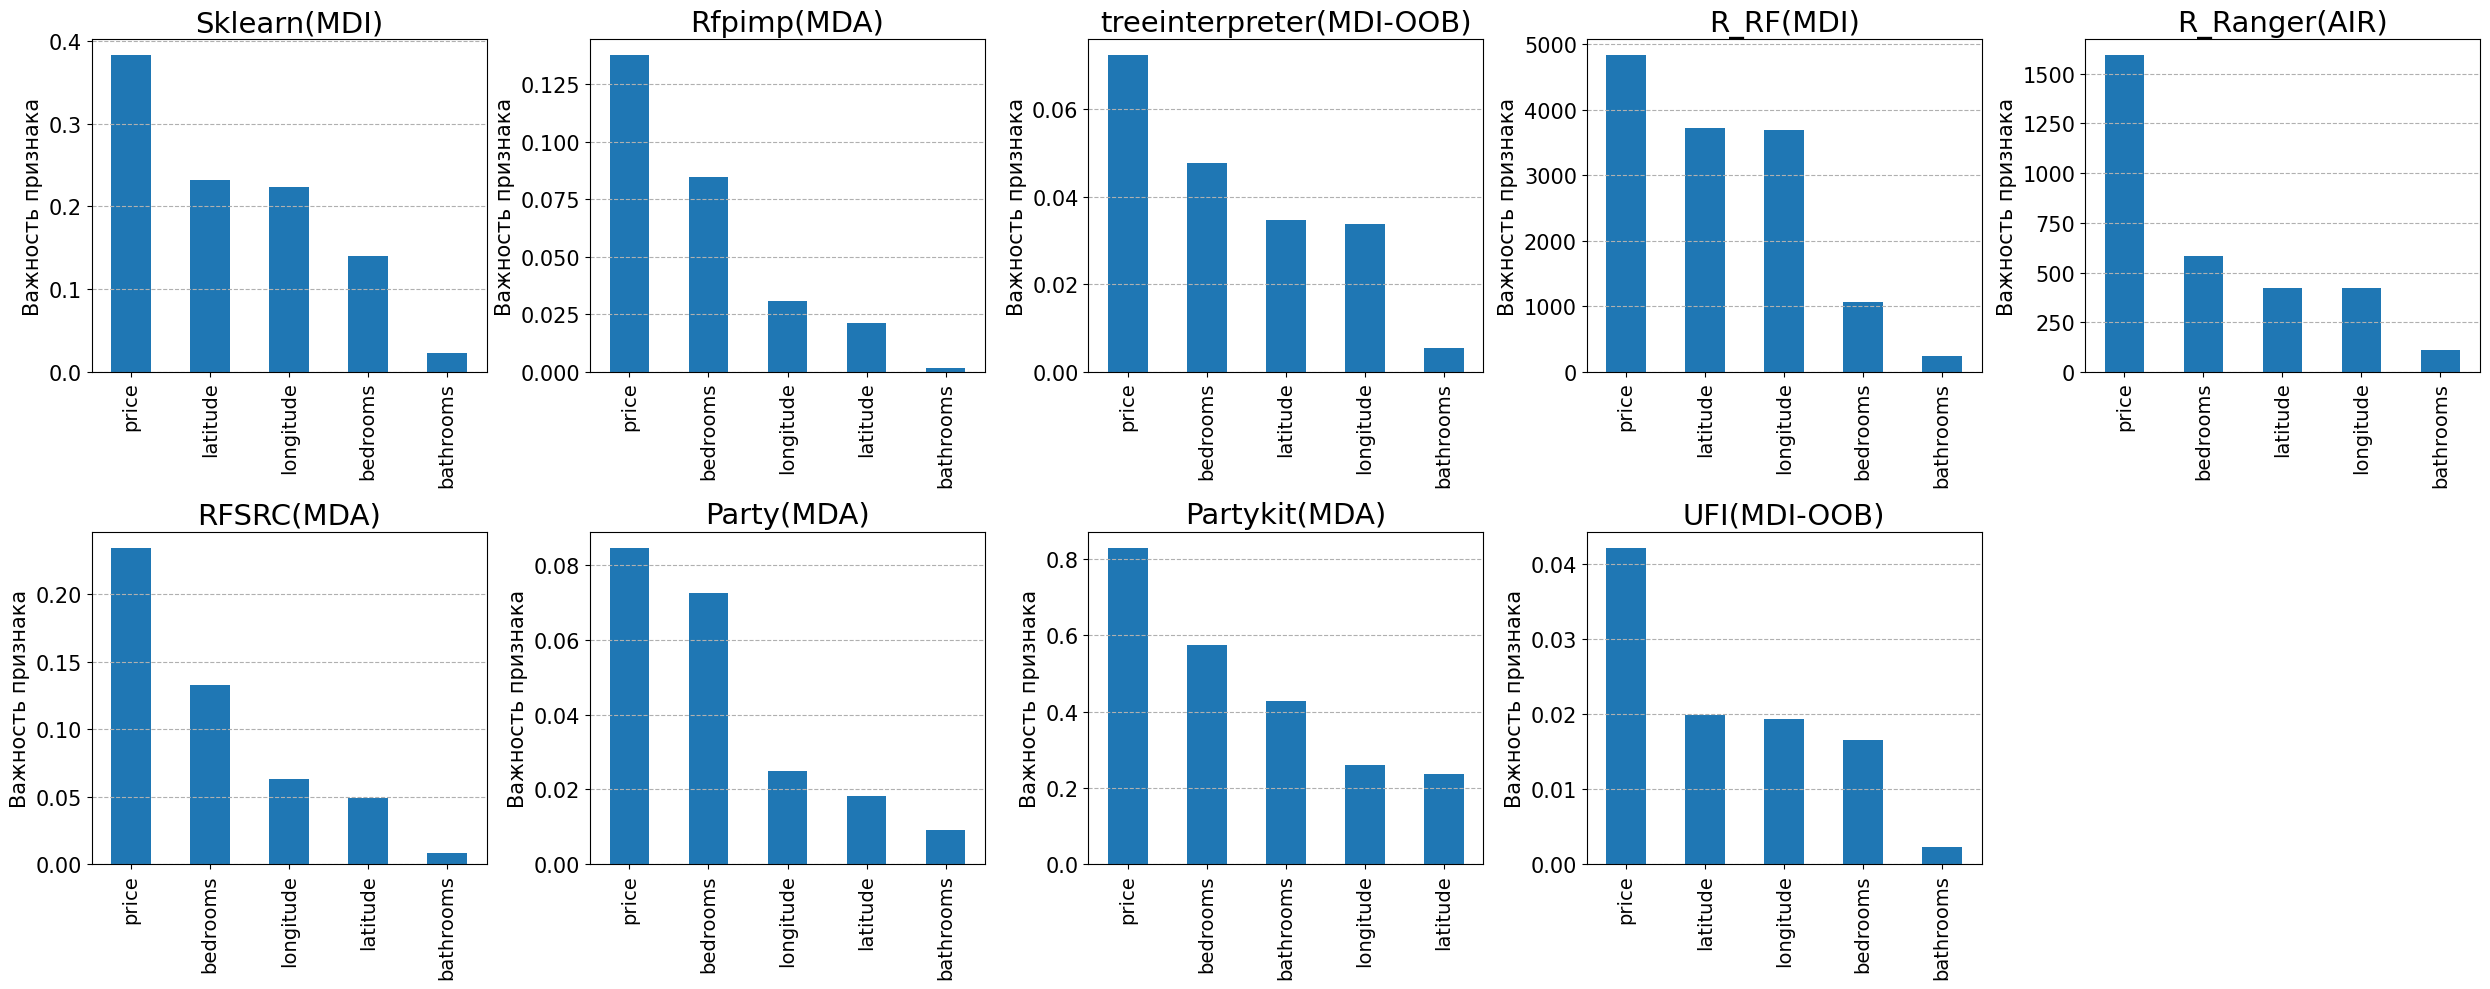

In [6]:
importance_series_list_1 = experiment(X, y)

In [7]:
importance_series_list_1

[price        0.382978
 latitude     0.231774
 longitude    0.223081
 bedrooms     0.139886
 bathrooms    0.022282
 dtype: float64,
 price        0.137676
 bedrooms     0.084794
 longitude    0.031000
 latitude     0.021376
 bathrooms    0.001621
 dtype: float64,
 price        0.072376
 bedrooms     0.047692
 latitude     0.034770
 longitude    0.033851
 bathrooms    0.005524
 dtype: float64,
 price        4836.486193
 latitude     3730.726157
 longitude    3690.189966
 bedrooms     1072.488997
 bathrooms     238.463493
 dtype: float64,
 price        1593.543459
 bedrooms      583.124672
 latitude      423.681062
 longitude     421.870337
 bathrooms     108.009001
 dtype: float64,
 price        0.234305
 bedrooms     0.132431
 longitude    0.063104
 latitude     0.048897
 bathrooms    0.008692
 Name: randomForestSRC_MDA, dtype: float64,
 price        0.084534
 bedrooms     0.072448
 longitude    0.024850
 latitude     0.018353
 bathrooms    0.009193
 Name: party_cforest_importance, dty

<font size="8">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [8]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2026-02-05 14:23:04,626] A new study created in memory with name: no-name-71246d9d-d52c-4452-a3aa-102987823a93
[I 2026-02-05 14:23:05,345] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 124, 'max_depth': 1, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-05 14:23:06,004] Trial 1 finished with value: 0.7073275752893797 and parameters: {'n_estimators': 53, 'max_depth': 7, 'min_samples_leaf': 13, 'max_features': 0.7}. Best is trial 1 with value: 0.7073275752893797.
[I 2026-02-05 14:23:06,639] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 108, 'max_depth': 1, 'min_samples_leaf': 9, 'max_features': 1.0}. Best is trial 1 with value: 0.7073275752893797.
[I 2026-02-05 14:23:07,388] Trial 3 finished with value: 0.6992730680580532 and parameters: {'n_estimators': 114, 'max_depth': 4, 'min_samples_leaf': 14, 'max_features': 0.3333333333333333}. Best is trial 1 with value

{'n_estimators': 90, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
best_params: {'n_estimators': 90, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt'}
the importance of sklearn: price             0.320343
latitude          0.147433
longitude         0.141632
bedrooms          0.114065
random_uniform    0.084475
random_normal     0.082463
random_int        0.069620
bathrooms         0.027874
random_binary     0.012095
dtype: float64
the importance of rfpimp: price             0.094621
bedrooms          0.055111
longitude         0.014588
latitude          0.010536
random_binary     0.000000
bathrooms        -0.000101
random_uniform   -0.000101
random_int       -0.000203
random_normal    -0.001418
dtype: float64
the importance of treeinterpreter: price             0.065843
bedrooms          0.040572
latitude          0.025207
longitude         0.024090
random_uniform    0.008593
random_normal     0.007988
bathrooms         0.007873
random_int        0.00

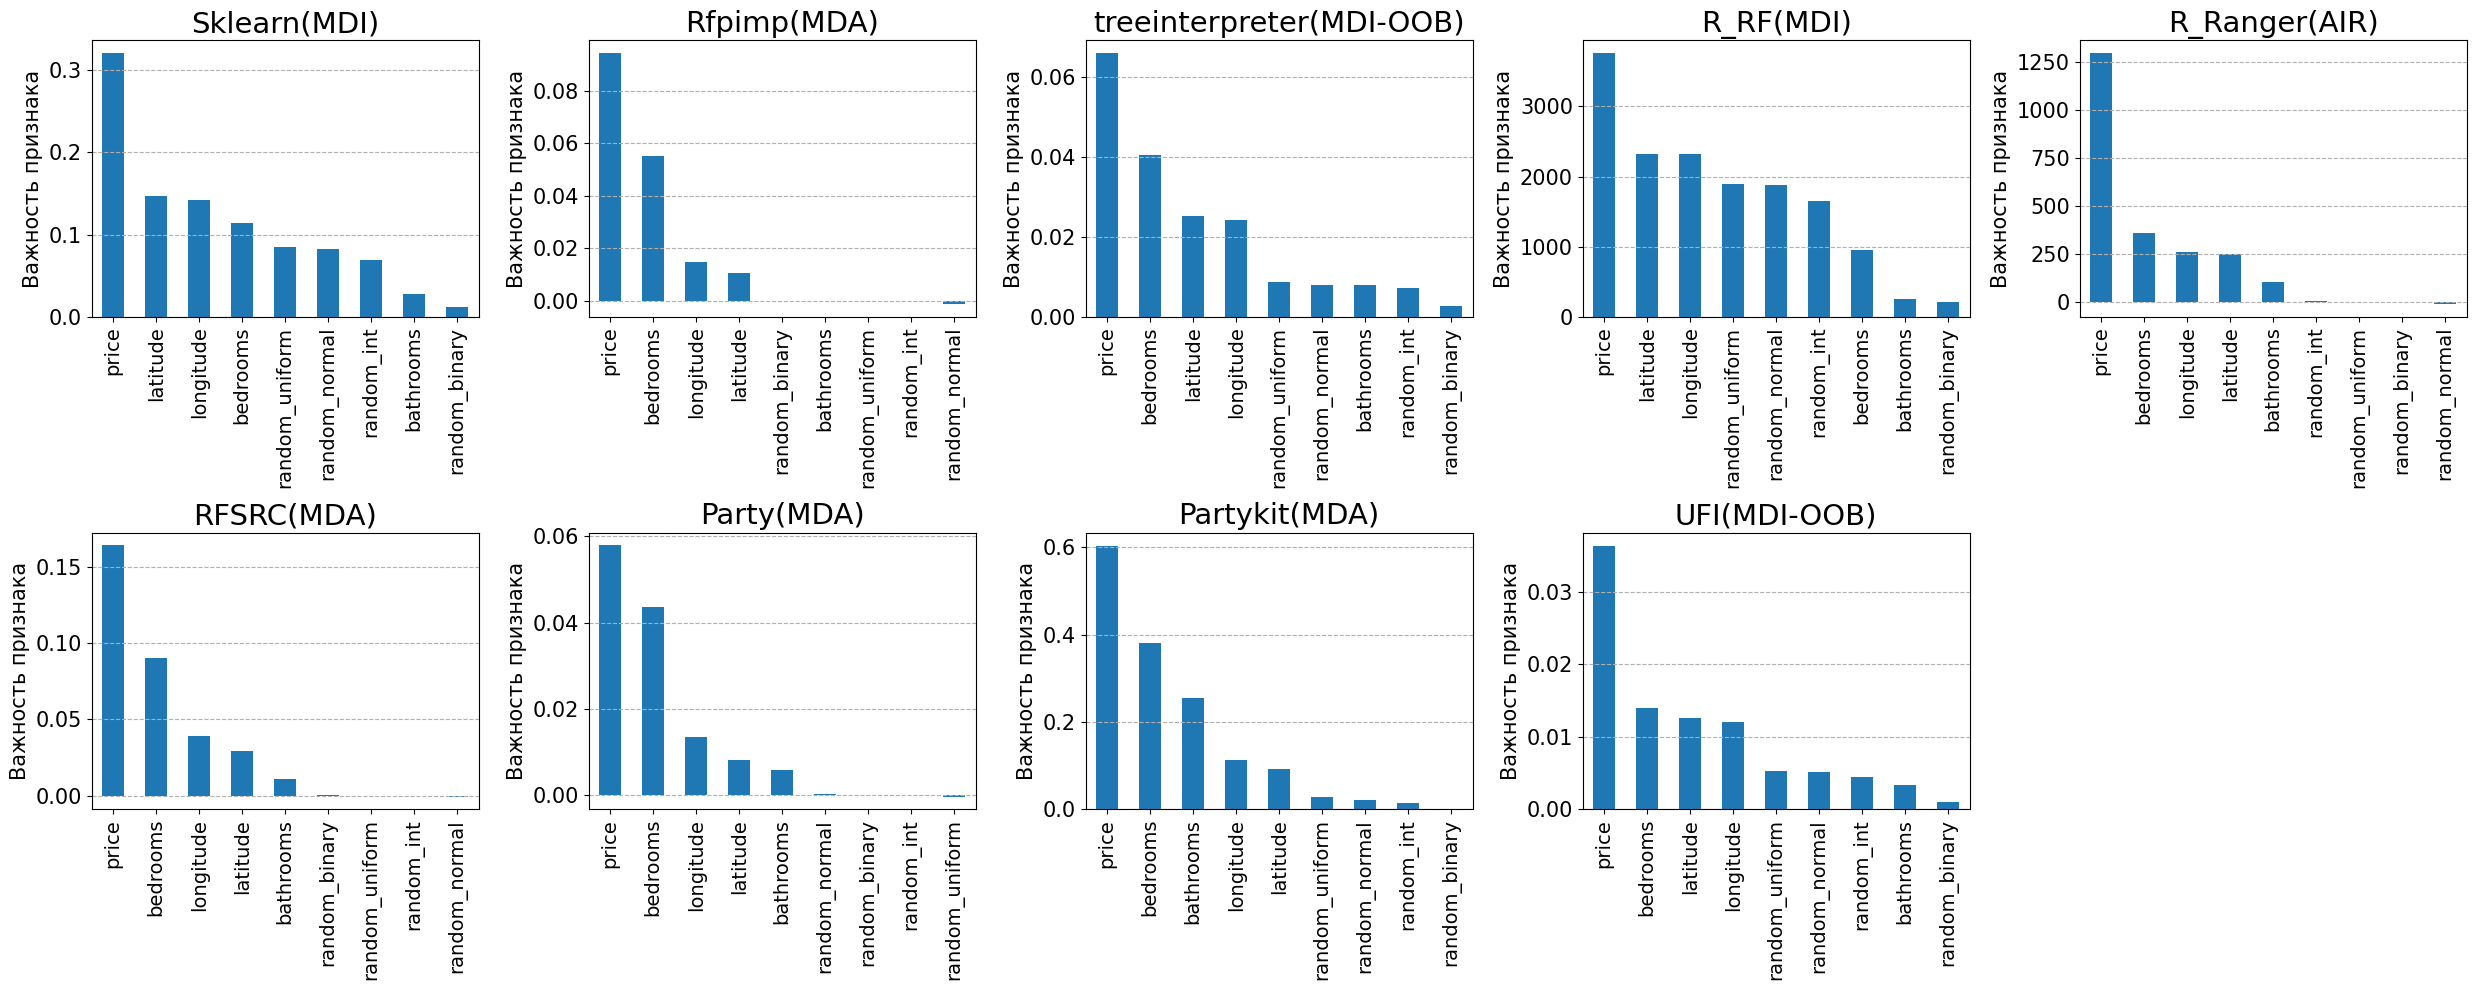

In [9]:
importance_series_list_2 = experiment(X, y)

In [10]:
importance_series_list_2

[price             0.320343
 latitude          0.147433
 longitude         0.141632
 bedrooms          0.114065
 random_uniform    0.084475
 random_normal     0.082463
 random_int        0.069620
 bathrooms         0.027874
 random_binary     0.012095
 dtype: float64,
 price             0.094621
 bedrooms          0.055111
 longitude         0.014588
 latitude          0.010536
 random_binary     0.000000
 bathrooms        -0.000101
 random_uniform   -0.000101
 random_int       -0.000203
 random_normal    -0.001418
 dtype: float64,
 price             0.065843
 bedrooms          0.040572
 latitude          0.025207
 longitude         0.024090
 random_uniform    0.008593
 random_normal     0.007988
 bathrooms         0.007873
 random_int        0.007317
 random_binary     0.002768
 dtype: float64,
 price             3755.644961
 latitude          2321.377563
 longitude         2319.652103
 random_uniform    1899.562778
 random_normal     1884.910557
 random_int        1651.840231
 bedroo

<font size="8">Source features + copy of the 'price' feature.</font>

In [11]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2026-02-05 15:20:34,230] A new study created in memory with name: no-name-8a4ed3de-0be8-469e-a3d1-099ec50a6514
[I 2026-02-05 15:20:35,710] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 82, 'max_depth': 1, 'min_samples_leaf': 19, 'max_features': 1.0}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-05 15:20:37,295] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 95, 'max_depth': 1, 'min_samples_leaf': 13, 'max_features': 0.3333333333333333}. Best is trial 0 with value: 0.6962589600060789.
[I 2026-02-05 15:20:38,286] Trial 2 finished with value: 0.7000329272308199 and parameters: {'n_estimators': 51, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 0.7}. Best is trial 2 with value: 0.7000329272308199.
[I 2026-02-05 15:20:39,709] Trial 3 finished with value: 0.7048960259365264 and parameters: {'n_estimators': 63, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 0.7}. Best is trial 3 with value: 0

{'n_estimators': 67, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 0.5}
best_params: {'n_estimators': 67, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 0.5}
the importance of sklearn: latitude     0.207262
longitude    0.205609
bedrooms     0.153660
price        0.117428
price1       0.109507
price3       0.099135
price2       0.092942
bathrooms    0.014457
dtype: float64
the importance of rfpimp: bedrooms     0.078614
longitude    0.021781
latitude     0.016412
price        0.010435
price1       0.007699
price3       0.006788
price2       0.004356
bathrooms    0.001317
dtype: float64
the importance of treeinterpreter: bedrooms     0.050978
longitude    0.035252
latitude     0.033048
price        0.022229
price1       0.020356
price3       0.017534
price2       0.016170
bathrooms    0.004575
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)
S

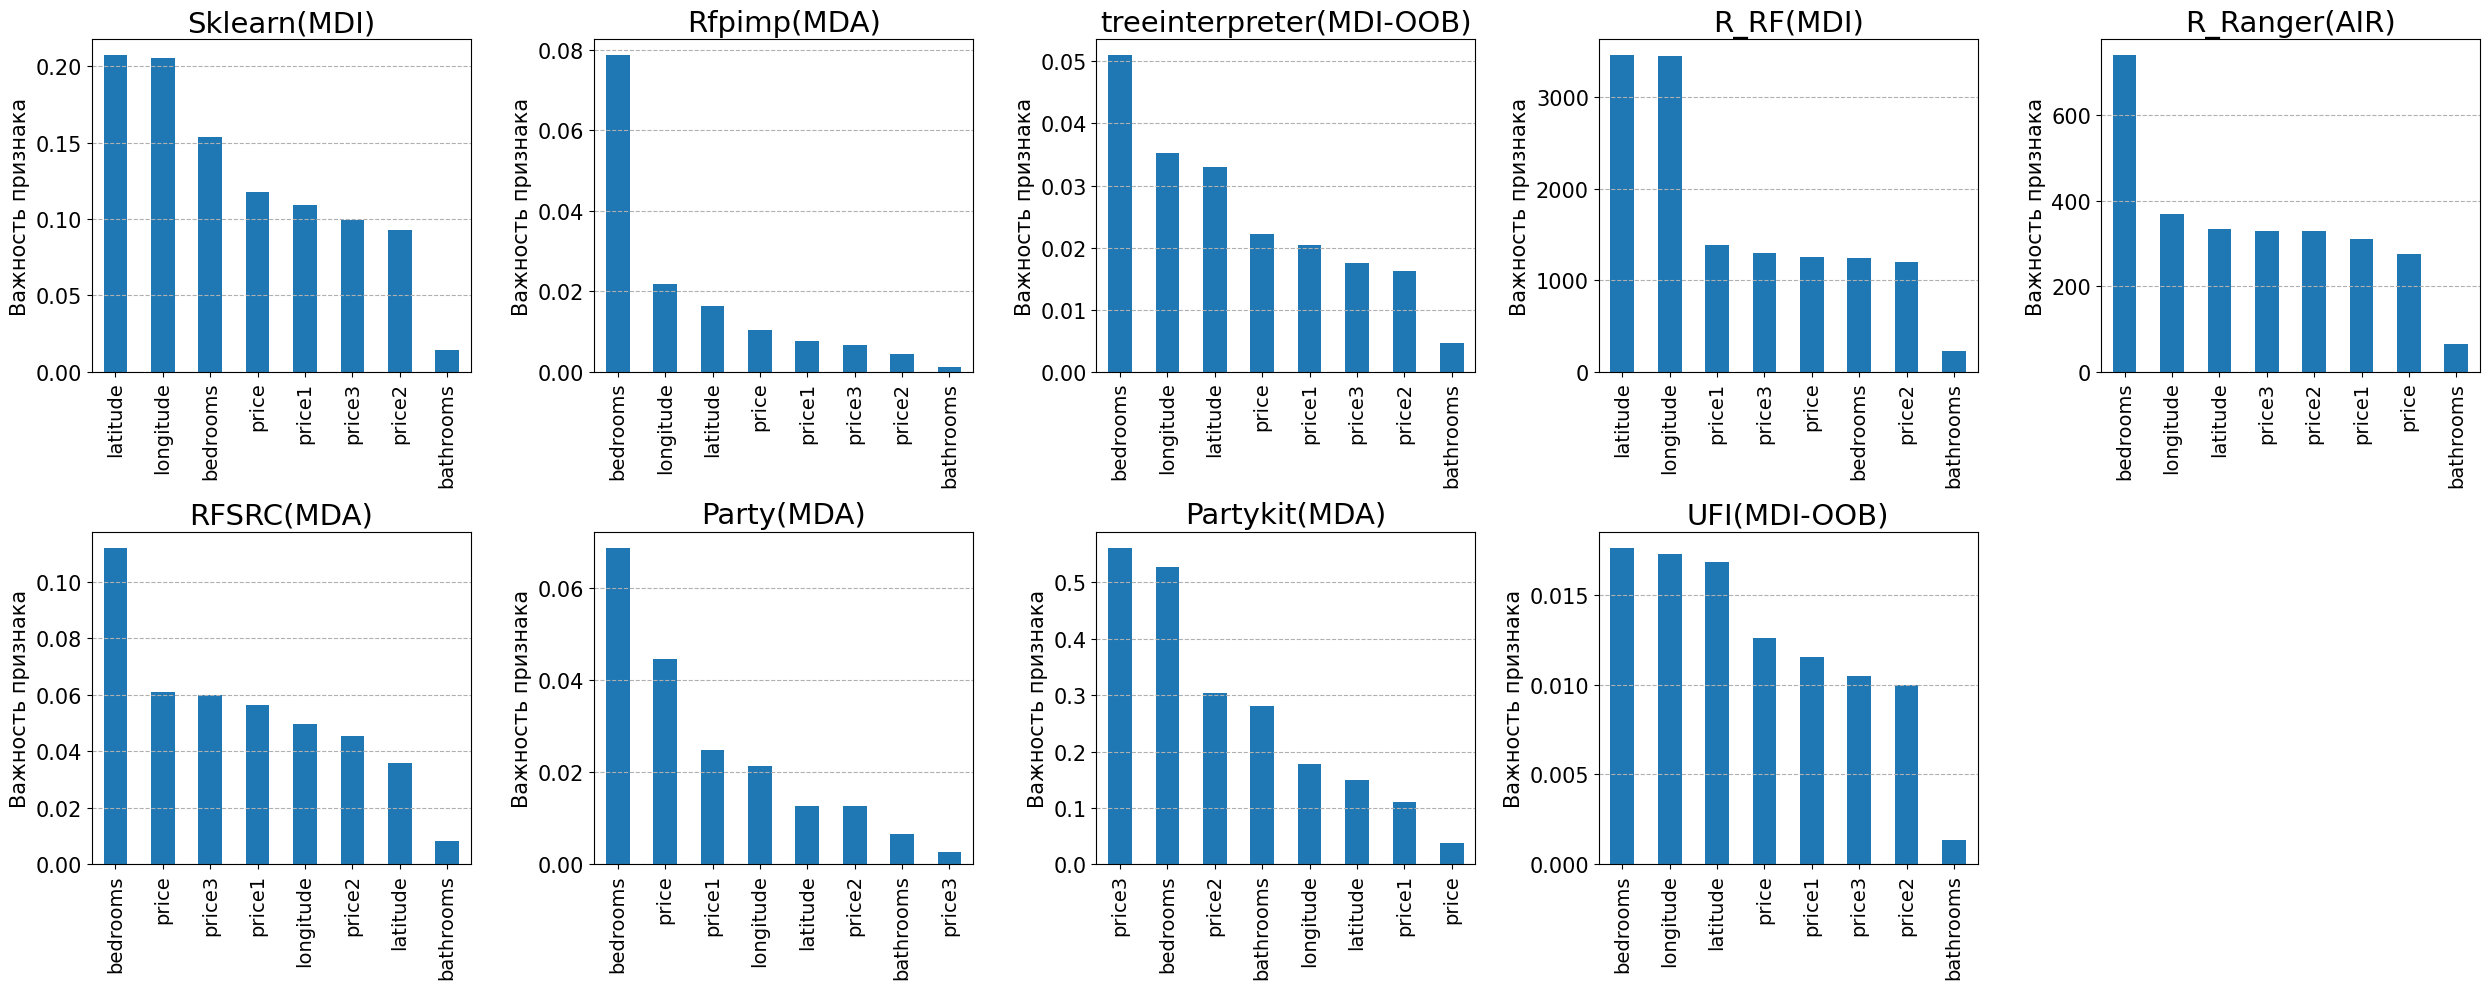

In [12]:
importance_series_list_3 = experiment(X, y)

In [13]:
importance_series_list_3

[latitude     0.207262
 longitude    0.205609
 bedrooms     0.153660
 price        0.117428
 price1       0.109507
 price3       0.099135
 price2       0.092942
 bathrooms    0.014457
 dtype: float64,
 bedrooms     0.078614
 longitude    0.021781
 latitude     0.016412
 price        0.010435
 price1       0.007699
 price3       0.006788
 price2       0.004356
 bathrooms    0.001317
 dtype: float64,
 bedrooms     0.050978
 longitude    0.035252
 latitude     0.033048
 price        0.022229
 price1       0.020356
 price3       0.017534
 price2       0.016170
 bathrooms    0.004575
 dtype: float64,
 latitude     3459.869051
 longitude    3450.421532
 price1       1383.626948
 price3       1298.213063
 price        1255.902938
 bedrooms     1242.871811
 price2       1203.465022
 bathrooms     223.159334
 dtype: float64,
 bedrooms     740.852318
 longitude    369.353234
 latitude     334.378862
 price3       329.999408
 price2       329.243963
 price1       311.427866
 price        275.3498

<font size="8">Initial features + random feature random.</font>

In [14]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2026-02-05 16:00:44,758] A new study created in memory with name: no-name-a398988b-87d9-4e74-a4eb-d53ae8f4fcf5
[I 2026-02-05 16:00:46,172] Trial 0 finished with value: 0.701881917884552 and parameters: {'n_estimators': 84, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.701881917884552.
[I 2026-02-05 16:00:46,814] Trial 1 finished with value: 0.6983359084116411 and parameters: {'n_estimators': 42, 'max_depth': 3, 'min_samples_leaf': 2, 'max_features': 0.5}. Best is trial 0 with value: 0.701881917884552.
[I 2026-02-05 16:00:47,351] Trial 2 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 39, 'max_depth': 2, 'min_samples_leaf': 11, 'max_features': 0.25}. Best is trial 0 with value: 0.701881917884552.
[I 2026-02-05 16:00:49,164] Trial 3 finished with value: 0.7003115422608344 and parameters: {'n_estimators': 126, 'max_depth': 9, 'min_samples_leaf': 12, 'max_features': 0.25}. Best is trial 0 with value: 0.701881917884

{'n_estimators': 77, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
best_params: {'n_estimators': 77, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
the importance of sklearn: price        0.332971
longitude    0.191071
latitude     0.188814
random       0.143120
bedrooms     0.111028
bathrooms    0.032997
dtype: float64
the importance of rfpimp: price        0.108297
bedrooms     0.067065
longitude    0.023908
latitude     0.014791
bathrooms    0.004255
random       0.002330
dtype: float64
the importance of treeinterpreter: price        0.066278
bedrooms     0.040764
latitude     0.028501
longitude    0.027435
random       0.012124
bathrooms    0.009866
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4422.458213
random       3055.231899
latitude     3031.84

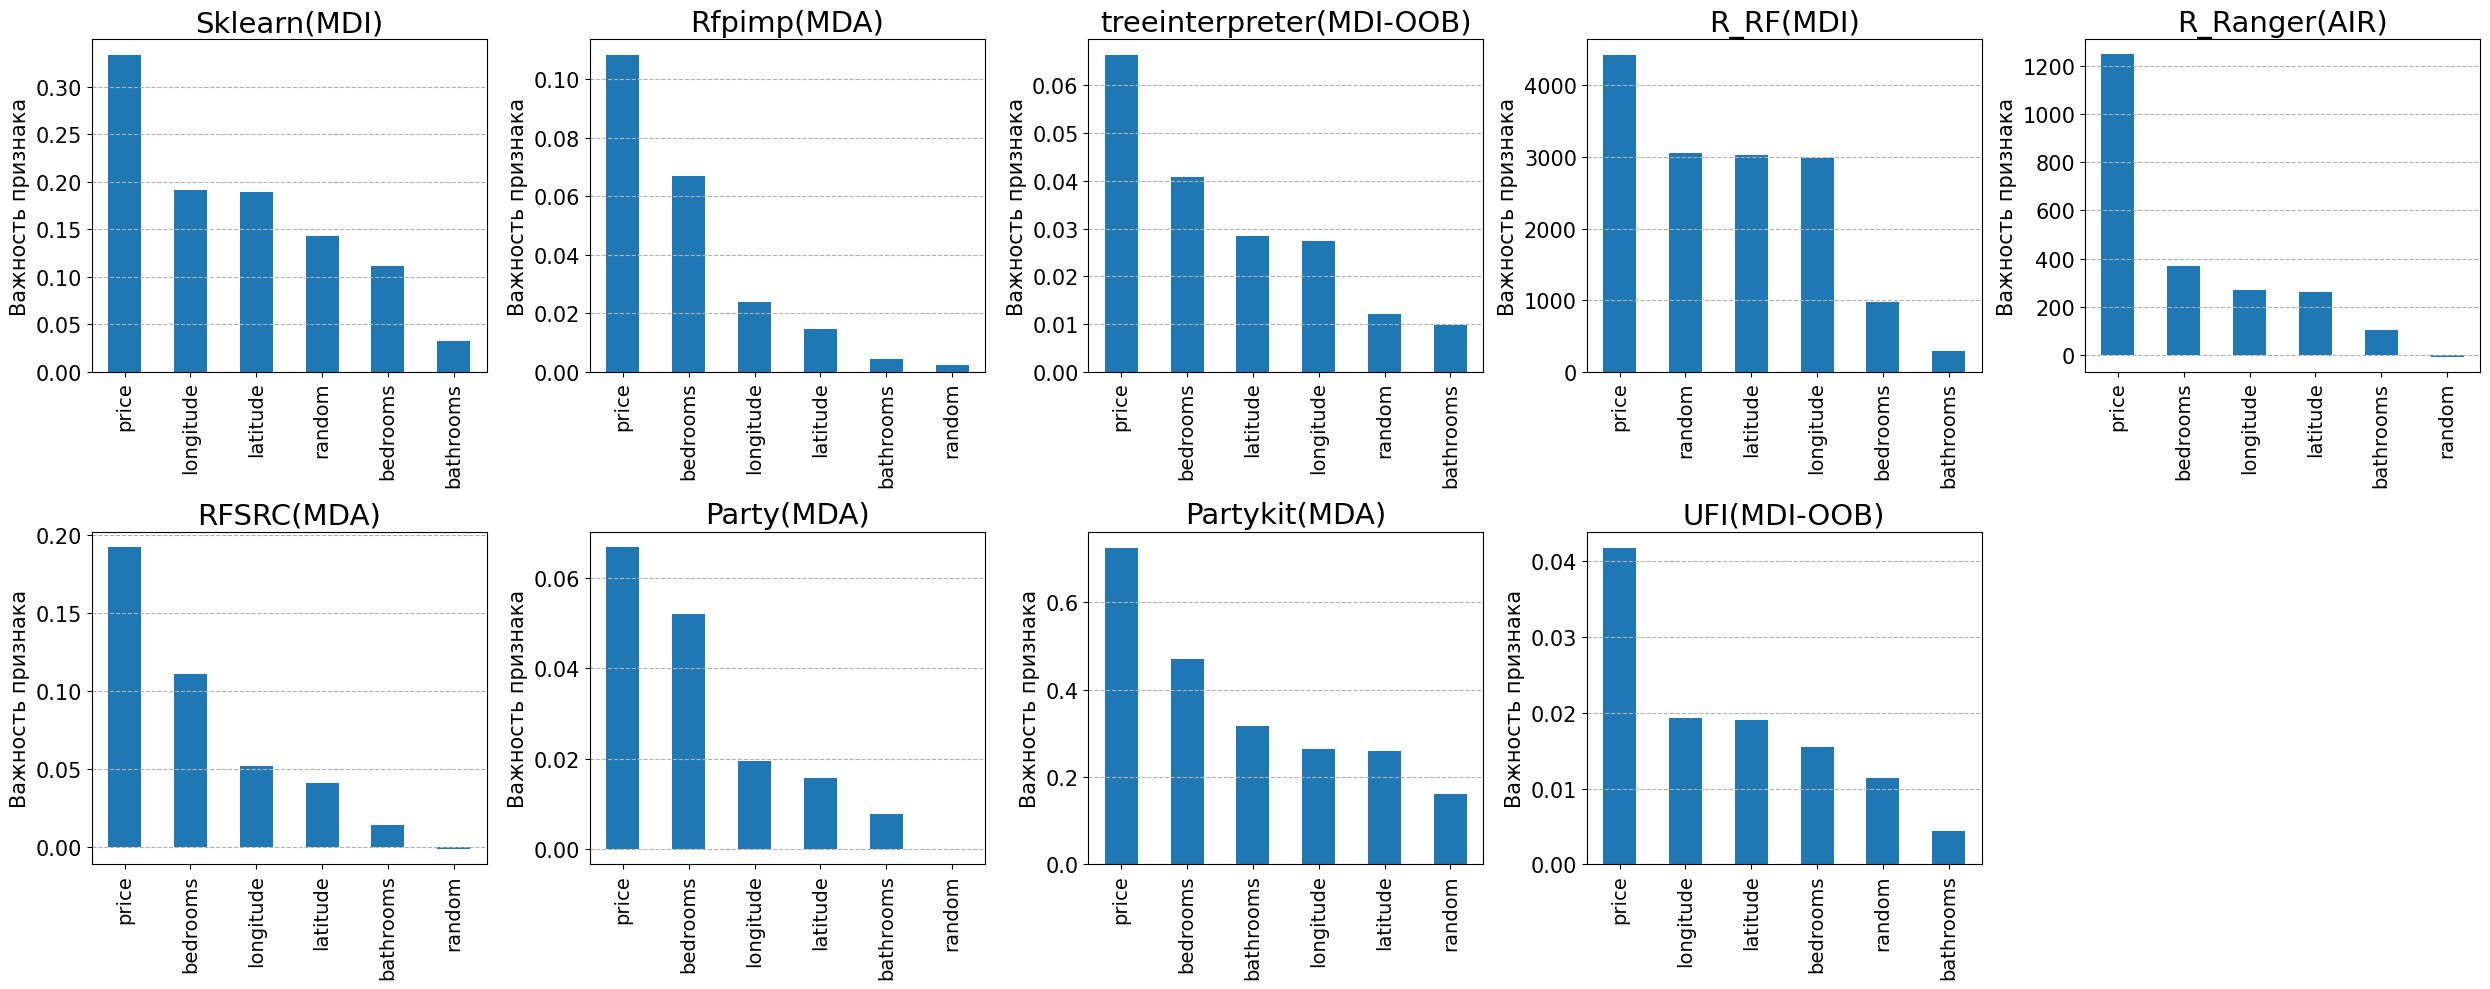

In [15]:
importance_series_list_4 = experiment(X, y)

In [16]:
importance_series_list_4

[price        0.332971
 longitude    0.191071
 latitude     0.188814
 random       0.143120
 bedrooms     0.111028
 bathrooms    0.032997
 dtype: float64,
 price        0.108297
 bedrooms     0.067065
 longitude    0.023908
 latitude     0.014791
 bathrooms    0.004255
 random       0.002330
 dtype: float64,
 price        0.066278
 bedrooms     0.040764
 latitude     0.028501
 longitude    0.027435
 random       0.012124
 bathrooms    0.009866
 dtype: float64,
 price        4422.458213
 random       3055.231899
 latitude     3031.842366
 longitude    2992.501663
 bedrooms      979.082693
 bathrooms     297.965753
 dtype: float64,
 price        1246.780659
 bedrooms      370.362737
 longitude     271.121080
 latitude      260.996519
 bathrooms     105.350253
 random         -6.565343
 dtype: float64,
 price        0.192529
 bedrooms     0.110890
 longitude    0.052054
 latitude     0.041429
 bathrooms    0.014068
 random      -0.001178
 Name: randomForestSRC_MDA, dtype: float64,
 price 

<font size="8">Rendering all cases.</font>

<font size="4">Source features.</font>

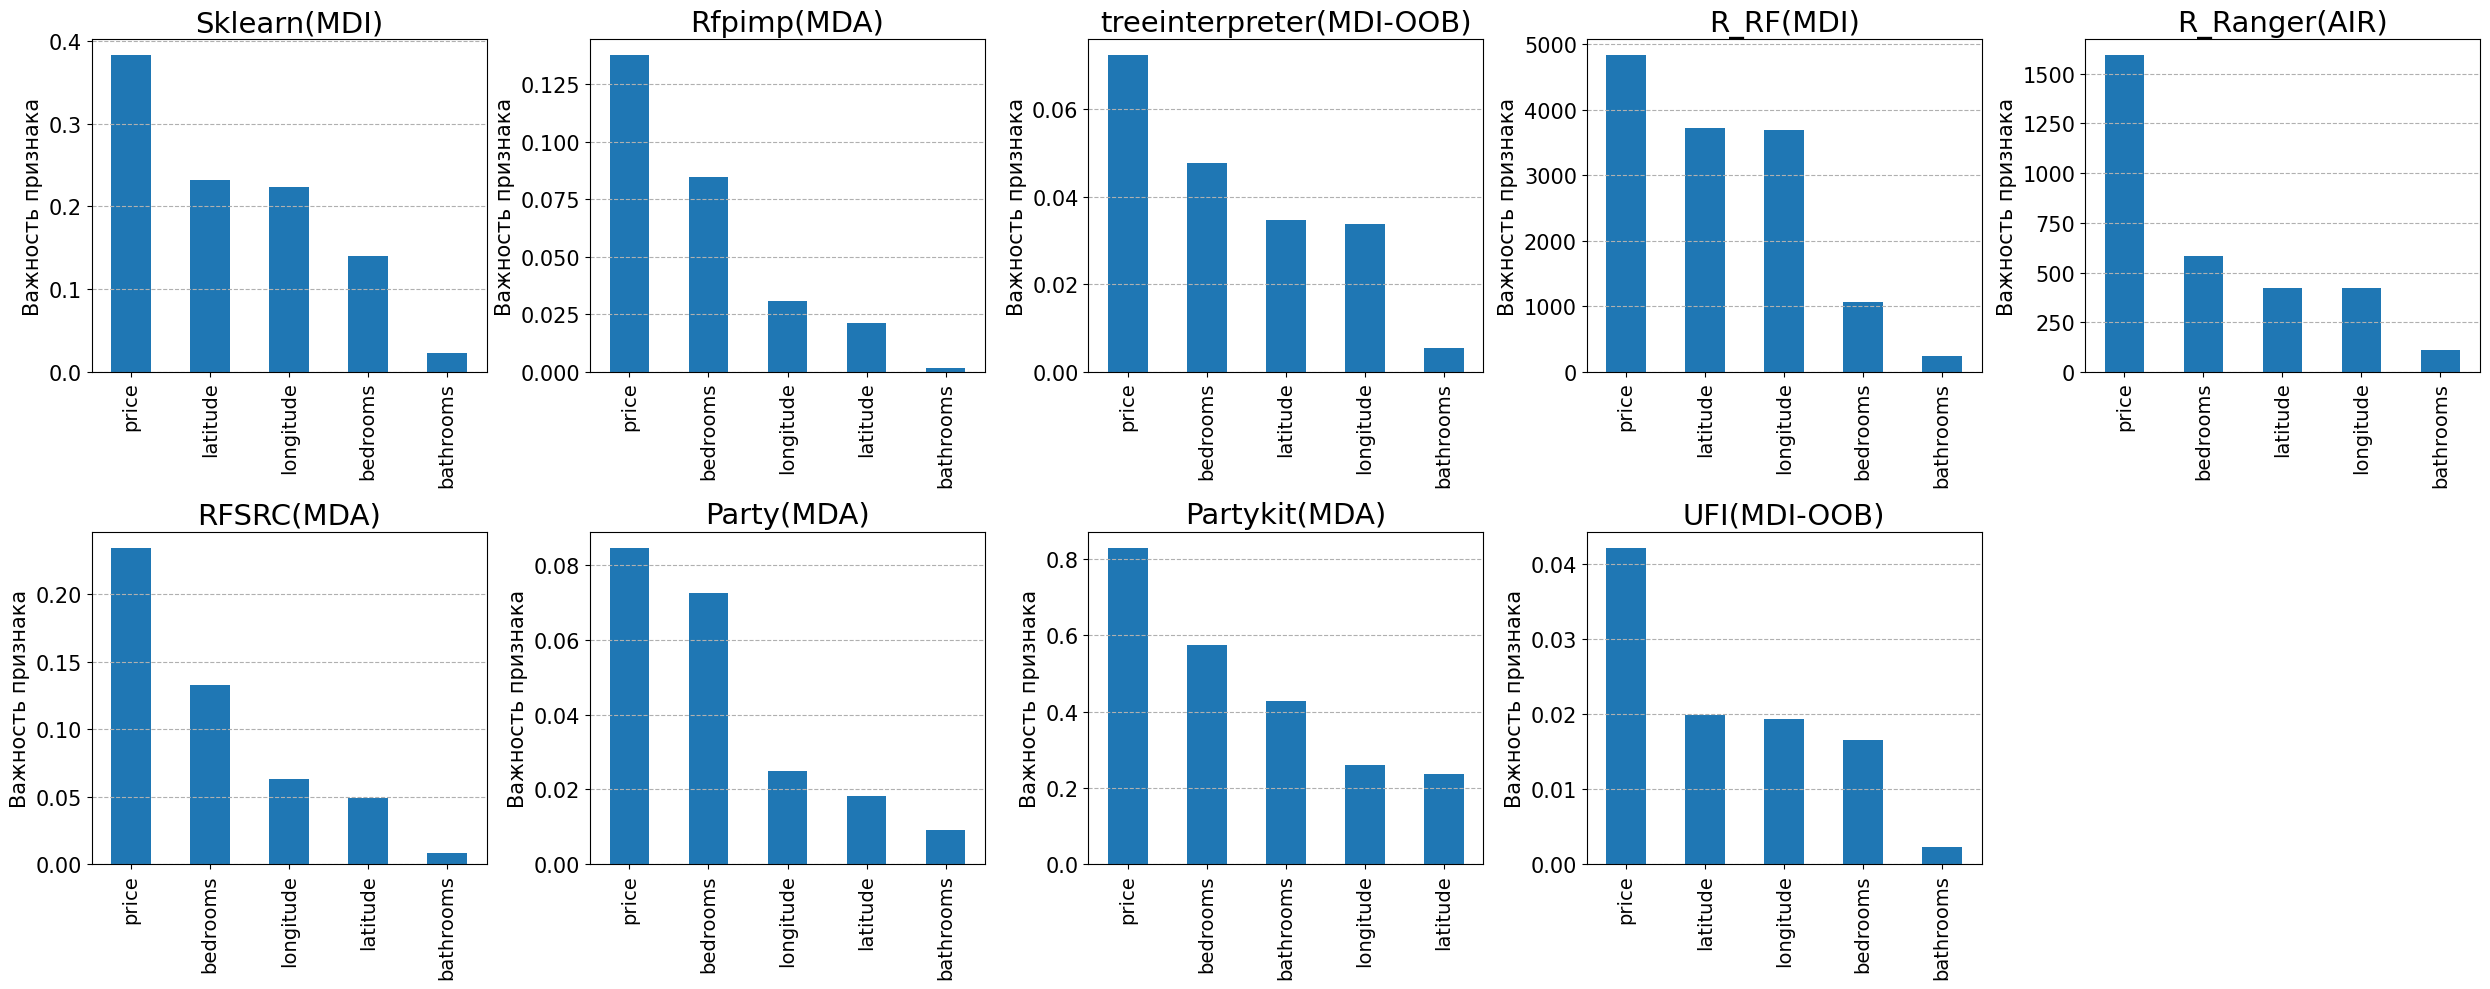

In [17]:
titles_list = ['Sklearn(MDI)', 'Rfpimp(MDA)', 'treeinterpreter(MDI-OOB)', 'R_RF(MDI)',
               'R_Ranger(AIR)', 'RFSRC(MDA)', 'Party(MDA)', 'Partykit(MDA)', 'UFI(MDI-OOB)']

picture(importance_series_list_1, titles_list)


<font size="4">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

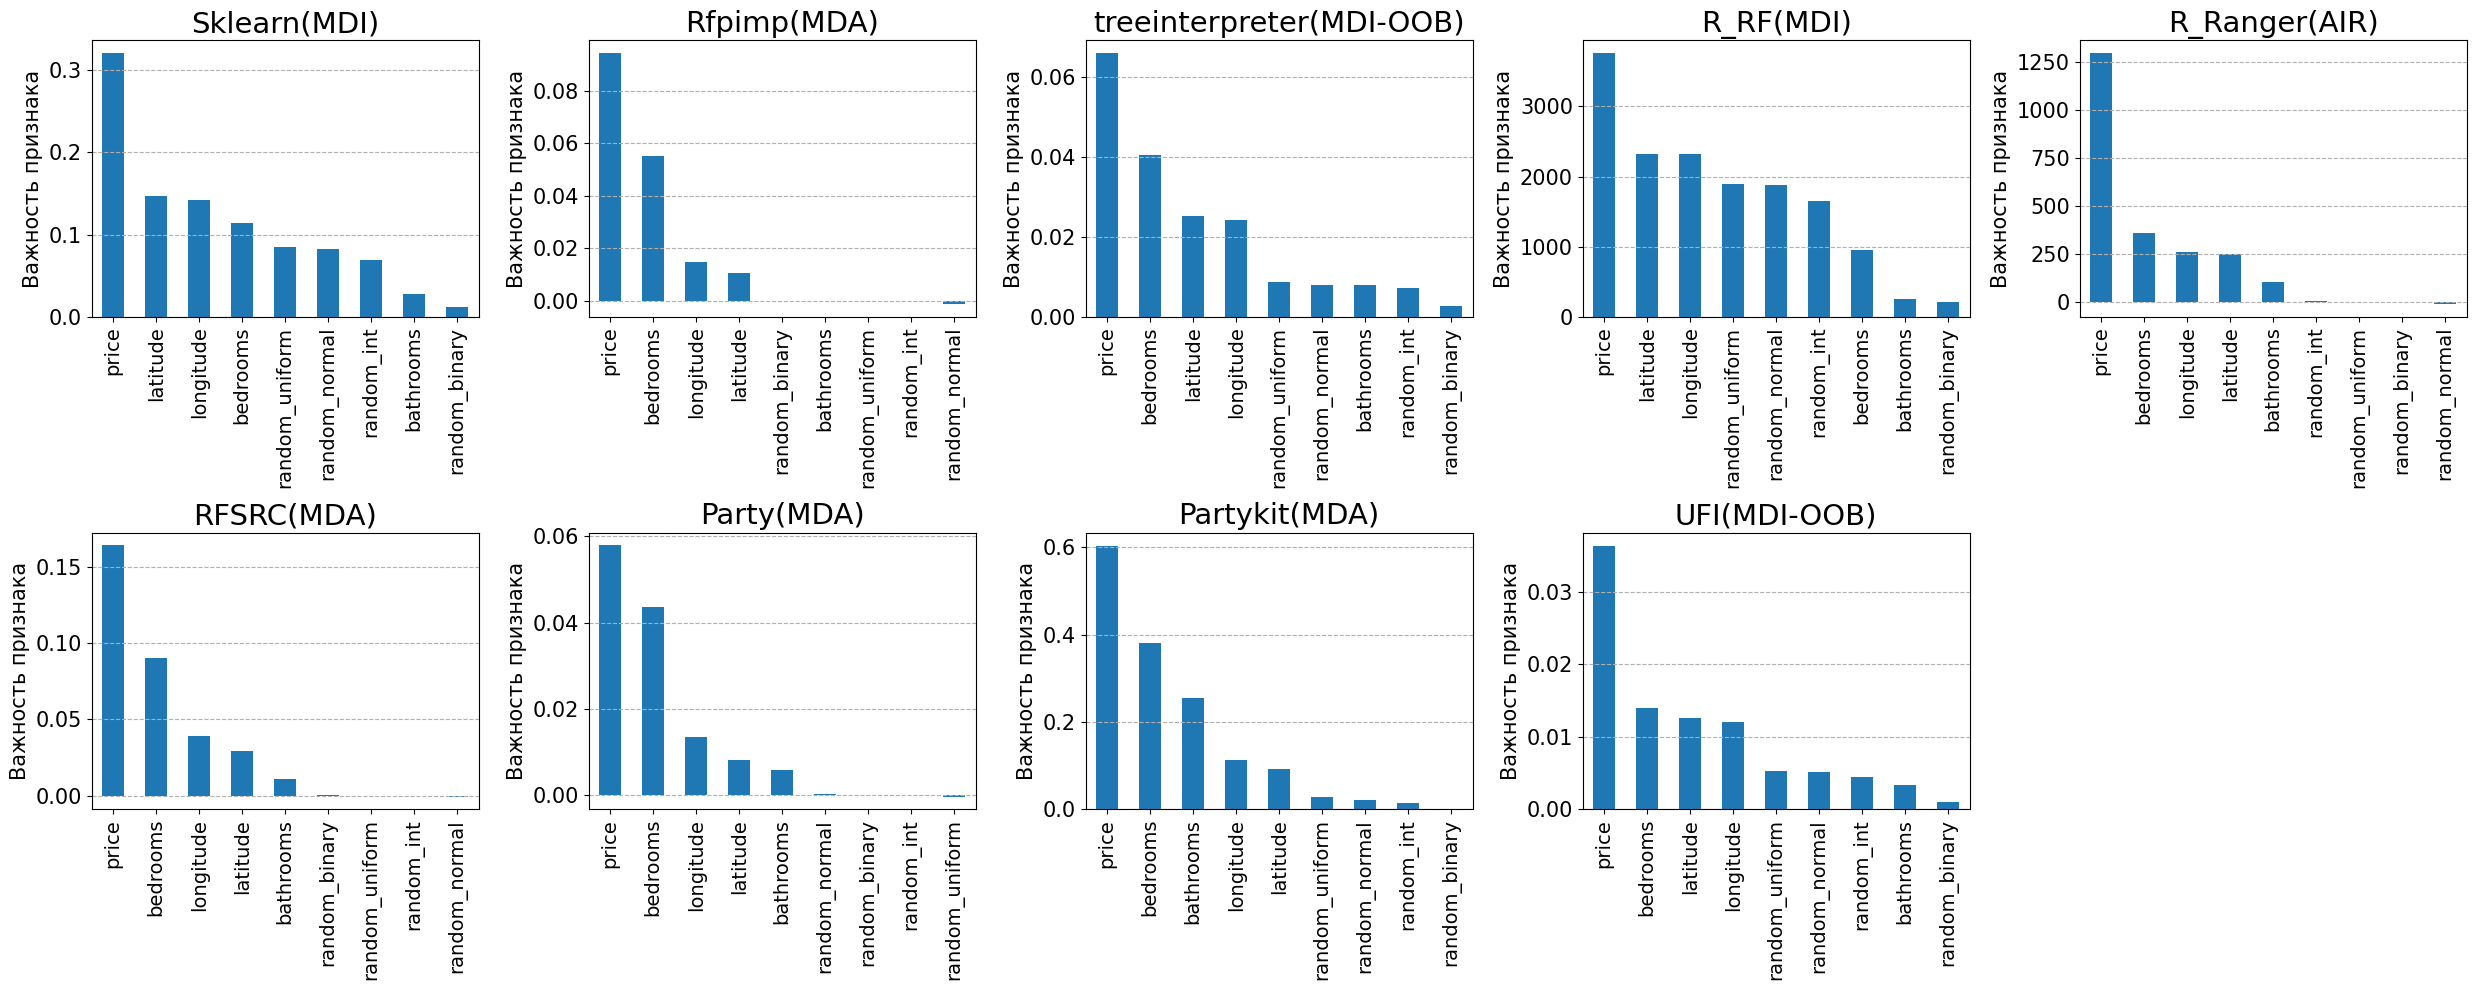

In [18]:
picture(importance_series_list_2, titles_list)

<font size="4">Source features + copy of the 'price' feature.</font>

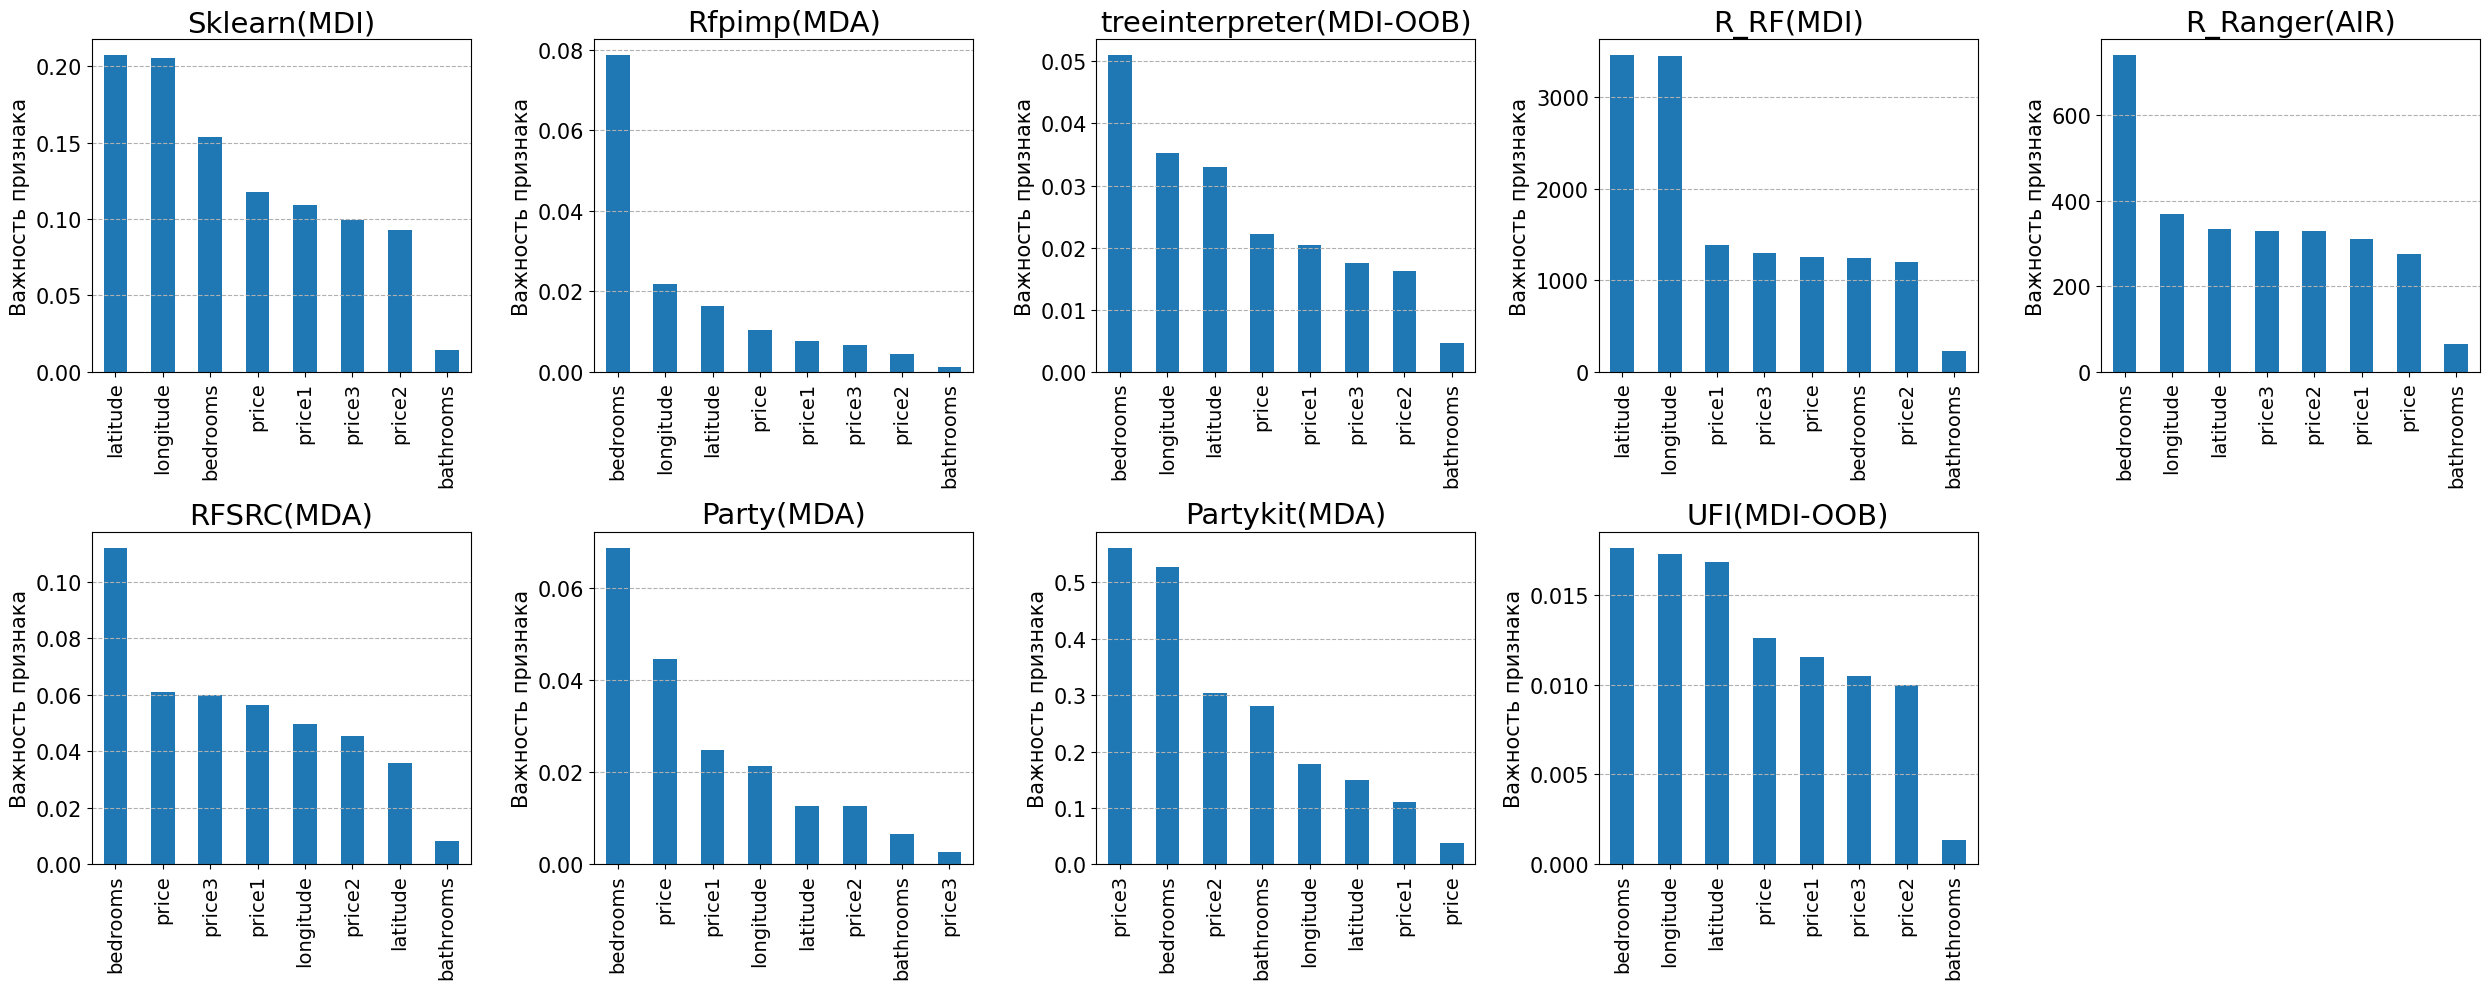

In [20]:
picture(importance_series_list_3, titles_list)

<font size="4">Initial features + random feature random.</font>

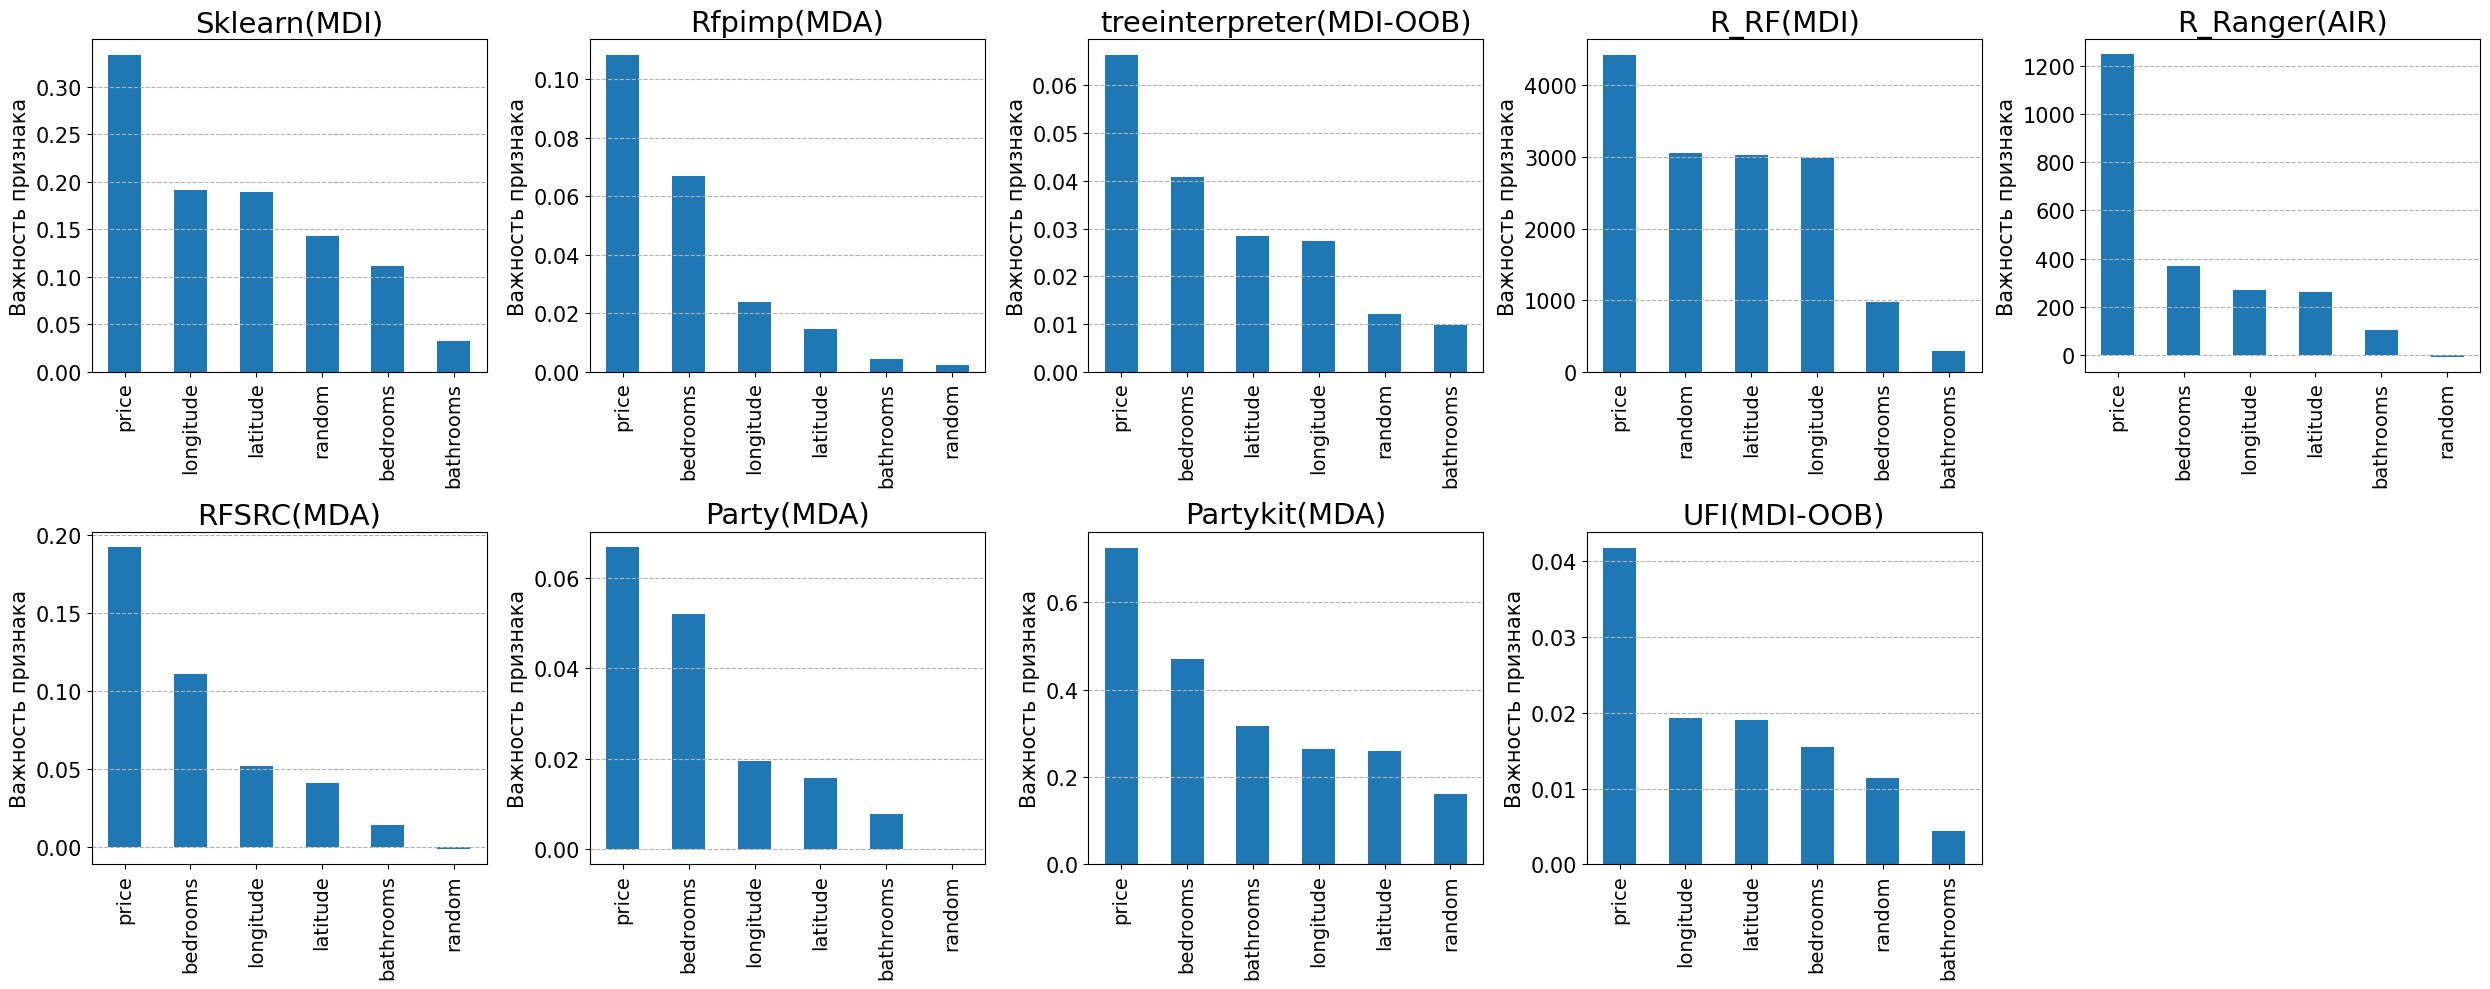

In [21]:
picture(importance_series_list_4, titles_list)